In [1]:
import pandas as pd
import pandautils as pup
import numpy as np
from rootpy.vector import LorentzVector
from rootpy.plotting.style import get_style, set_style
import matplotlib.pyplot as plt
import fit
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
# -- open a file to svae the names of the branches we are interested in (the ones containing Muons or Jets)
from rootpy.io import root_open
f = root_open("../MxAOD/Truth_11-30/user.mpaganin.mc15_13TeV.341175.A14NNPDF23LO_X350tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.Truth_11-30_MxAOD.root/user.mpaganin.7141844._000001.MxAOD.root", "read")
t = f["CollectionTree"]

features = [key.GetName() for key in t.GetListOfBranches() if (
        ('HGamMuonsAuxDyn' in key.GetName()) 
        or ('HGamAntiKt4EMTopoJetsAuxDyn' in key.GetName()) 
        or ('HGamPhotonsAuxDyn' in key.GetName()) 
        or ('m_yy' in key.GetName())
    )]
f.Close()

False

In [3]:
X350_df = pup.root2panda("../MxAOD/muons/muons2/user.mpaganin.mc15_13TeV.341175.A14NNPDF23LO_X350tohh_yybb.merge.DAOD_HIGG1D1.e3873_a766_a768_r6282_p2421.muons2_MxAOD.root/*", "CollectionTree",
                        branches = features) 

In [4]:
signal_df = X350_df

In [105]:
class Jet(object):
    """
    Better Jet Class!

    Example:

    >>> j = Jet(100.1, 1.2, 1.0, 12) # instantiation with assignment
    >>> j.lv.Pt() # print pt
    100.1
    >>> j.pt = 205 # assign pt
    >>> j.lv.Pt()
    205

    """
    def __init__(self, pt = 0 , eta = 0, phi = 0, m = 0, btag = 0):
        super(Jet, self).__init__()

        self.btag = btag
        
        # -- hidden to most usage
        self._pt = pt
        self._eta = eta
        self._phi = phi
        self._m = m

        # -- Lorentz 4-vector
        self.lv = LorentzVector()
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    def _internal_update(self):
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    @property
    def pt(self):
        return self._pt

    @pt.setter
    def pt(self, value):
        self._pt = value
        self._internal_update()
        
    @property
    def eta(self):
        return self._eta

    @eta.setter
    def eta(self, value):
        self._eta = value
        self._internal_update()        

    @property
    def phi(self):
        return self._phi

    @phi.setter
    def phi(self, value):
        self._phi = value
        self._internal_update()
        
    @property
    def m(self):
        return self._m

    @m.setter
    def m(self, value):
        self._m = value
        self._internal_update()


In [108]:
class Photon(object):
    """
    Photon Class
    """
    def __init__(self, pt = 0 , eta = 0, phi = 0, m = 0):
        super(Photon, self).__init__()
        
        # -- hidden to most usage
        self._pt = pt
        self._eta = eta
        self._phi = phi
        self._m = m

        # -- Lorentz 4-vector
        self.lv = LorentzVector()
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    def _internal_update(self):
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    @property
    def pt(self):
        return self._pt

    @pt.setter
    def pt(self, value):
        self._pt = value
        self._internal_update()
        
    @property
    def eta(self):
        return self._eta

    @eta.setter
    def eta(self, value):
        self._eta = value
        self._internal_update()        

    @property
    def phi(self):
        return self._phi

    @phi.setter
    def phi(self, value):
        self._phi = value
        self._internal_update()
        
    @property
    def m(self):
        return self._m

    @m.setter
    def m(self, value):
        self._m = value
        self._internal_update()


In [256]:
class Muon(object):
    """
    Muon Class
    """
    def __init__(self, pt = 0 , eta = 0, phi = 0, m = 0):
        super(Muon, self).__init__()
        
        # -- hidden to most usage
        self._pt = pt
        self._eta = eta
        self._phi = phi
        self._m = m

        # -- Lorentz 4-vector
        self.lv = LorentzVector()
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    def _internal_update(self):
        self.lv.SetPtEtaPhiM(self._pt, self._eta, self._phi, self._m)

    @property
    def pt(self):
        return self._pt

    @pt.setter
    def pt(self, value):
        self._pt = value
        self._internal_update()
        
    @property
    def eta(self):
        return self._eta

    @eta.setter
    def eta(self, value):
        self._eta = value
        self._internal_update()        

    @property
    def phi(self):
        return self._phi

    @phi.setter
    def phi(self, value):
        self._phi = value
        self._internal_update()
        
    @property
    def m(self):
        return self._m

    @m.setter
    def m(self, value):
        self._m = value
        self._internal_update()


In [260]:
jets = [Jet(pt, eta, phi, m, btag) for (pt, eta, phi, m, btag) in zip(
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.pt']),
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.eta']),
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.phi']),
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.m']),
    pup.flatten(signal_df['HGamAntiKt4EMTopoJetsAuxDyn.MV2c20_85'])
    )]

jets = pup.match_shape(np.array(jets), signal_df['HGamAntiKt4EMTopoJetsAuxDyn.pt'])

In [261]:
photons = [Photon(pt, eta, phi, m) for (pt, eta, phi, m) in zip(
    pup.flatten(signal_df['HGamPhotonsAuxDyn.pt']),
    pup.flatten(signal_df['HGamPhotonsAuxDyn.eta']),
    pup.flatten(signal_df['HGamPhotonsAuxDyn.phi']),
    pup.flatten(signal_df['HGamPhotonsAuxDyn.m'])
    )]

photons = pup.match_shape(np.array(photons), signal_df['HGamPhotonsAuxDyn.pt'])

In [262]:
muons = [Muon(pt, eta, phi, 105.65837) for (pt, eta, phi) in zip(
    pup.flatten(signal_df['HGamMuonsAuxDyn.pt']),
    pup.flatten(signal_df['HGamMuonsAuxDyn.eta']),
    pup.flatten(signal_df['HGamMuonsAuxDyn.phi'])
    )]

muons = pup.match_shape(np.array(muons), signal_df['HGamMuonsAuxDyn.pt'])

In [263]:
# -- cut out only b-jets
bjets = [((np.array(jets[ev]))[signal_df['HGamAntiKt4EMTopoJetsAuxDyn.MV2c20_85'][ev] == 1]).tolist() for ev in xrange(len(jets)
                                                                                                                )]

In [264]:
# -- select events with == 2 b-tagged jets (2-Tag Category)
a = [(len(bjets[ev]) == 2) for ev in xrange(len(bjets))] 
bjets_2 = np.array(bjets)[np.array(a)]
photons_2 = np.array(photons)[np.array(a)]
muons_2 = np.array(muons)[np.array(a)]

In [274]:
def deltaR(eta1, eta2, phi1, phi2):
    import math
    '''
    Definition:
    -----------
        Function that calculates DR between two objects given their etas and phis
    Args:
    -----
        eta1 = float, eta of first object
        eta2 = float, eta of second object
        phi1 = float, phi of first object
        phi2 = float, phi of second object
    Output:
    -------
        deltaR = float, distance between the two objects 
    '''
    DEta = abs(eta1-eta2)
    DPhi = math.acos(math.cos( abs( phi1-phi2 ) ) ) # hack to avoid |phi1-phi2| larger than 180 degrees
    return math.sqrt( pow(DEta,2) + pow(DPhi,2) ) 

In [368]:
# -- now we need to corrcet the jets by the muons, if the muons are inside of them
# -- start by calculating the distances between each muon and each jet. If the distance is less than a threshold, correct the jet by the muon
def apply_correction(DRMAX, bjets_2, muons_2):

    corr_bjets_2 = []
    for ev in xrange(len(bjets_2)): # loop thru events
        corr_bjets_2_perevent = []
        for jet in bjets_2[ev]: # loop thru jets
            muon_add = Muon() # save all muons before adding them to the jet
            if (len(muons_2[ev]) != 0): # if there is at least one muon, do correction
                for muon in muons_2[ev]: # loop thru muons
                    dr = deltaR(jet.eta, muon.eta, jet.phi, muon.phi) # calculate dr between muon and original jet
                if (dr < DRMAX): # if it's closer that the fixed DR, add in the muon
                    muon_add.lv += muon.lv
            corr_bjets_2_perevent.append(Jet(
                    (jet.lv + muon_add.lv).pt(),
                    (jet.lv + muon_add.lv).eta(),
                    (jet.lv + muon_add.lv).phi(),
                    (jet.lv + muon_add.lv).m(),
                    jet.btag
                ))
        corr_bjets_2.append(corr_bjets_2_perevent)
    
    return corr_bjets_2

In [369]:
bjets_2_corr04 = apply_correction(0.4, bjets_2, muons_2)
bjets_2_corr02 = apply_correction(0.2, bjets_2, muons_2)
bjets_2_corr01 = apply_correction(0.1, bjets_2, muons_2)

In [370]:
# -- uncorrected four vectors for dijet, diphoton and dihiggs systems
bb = []
yy = []
yybb = []
bb04 = []
yybb04 = []
bb02 = []
yybb02 = []
bb01 = []
yybb01 = []

for ev in xrange(len(bjets_2)):
    bb.append(bjets_2[ev][0].lv + bjets_2[ev][1].lv)
    yy.append(photons_2[ev][0].lv + photons_2[ev][1].lv)
    yybb.append(bjets_2[ev][0].lv + bjets_2[ev][1].lv + photons_2[ev][0].lv + photons_2[ev][1].lv)
    
    bb04.append(bjets_2_corr04[ev][0].lv + bjets_2_corr04[ev][1].lv)
    yybb04.append(bjets_2_corr04[ev][0].lv + bjets_2_corr04[ev][1].lv + photons_2[ev][0].lv + photons_2[ev][1].lv)
    bb02.append(bjets_2_corr02[ev][0].lv + bjets_2_corr02[ev][1].lv)
    yybb02.append(bjets_2_corr02[ev][0].lv + bjets_2_corr02[ev][1].lv + photons_2[ev][0].lv + photons_2[ev][1].lv)
    bb01.append(bjets_2_corr01[ev][0].lv + bjets_2_corr01[ev][1].lv)
    yybb01.append(bjets_2_corr01[ev][0].lv + bjets_2_corr01[ev][1].lv + photons_2[ev][0].lv + photons_2[ev][1].lv)

In [396]:
# set_style('ATLAS', mpl=True)

# bins = np.linspace(80,160,30)

# _ = plt.hist([bb[ev].M()/1000 for ev in xrange(len(bb))],
#             bins = bins,
#             histtype = 'step',
#             normed = True,
#             label = 'No Correction')
# _ = plt.hist([bb04[ev].M()/1000 for ev in xrange(len(bb04))],
#             bins = bins,
#             histtype = 'step',
#             normed = True,
#             label = 'Corrected, DR = 0.4')
# _ = plt.hist([bb02[ev].M()/1000 for ev in xrange(len(bb02))],
#             bins = bins,
#             histtype = 'step',
#             normed = True,
#             label = 'Corrected, DR = 0.2')
# _ = plt.hist([bb01[ev].M()/1000 for ev in xrange(len(bb01))],
#             bins = bins,
#             histtype = 'step',
#             normed = True,
#             label = 'Corrected, DR = 0.1')

# # -- fancy stuff
# plt.xlabel(r'$m_{b b} \ (GeV)$')
# plt.ylabel('Normalized')
# plt.legend(fontsize = 12)

# plt.show()

In [397]:
def dr_plots(corrected_recomass_04, corrected_recomass_02, corrected_recomass_01, recomass, xmin = 80, xmax = 160, ):
    set_style('ATLAS', mpl=True)
    
#     hista = np.asarray(corrected_recomass_04)/1000
#     histb = np.asarray(corrected_recomass_02)/1000
#     histd = np.asarray(corrected_recomass_01)/1000                 
#     histc = np.asarray(recomass)/1000

    hista = [corrected_recomass_04[ev].M()/1000 for ev in xrange(len(corrected_recomass_04))]
    histb = [corrected_recomass_02[ev].M()/1000 for ev in xrange(len(corrected_recomass_02))]
    histd = [corrected_recomass_01[ev].M()/1000 for ev in xrange(len(corrected_recomass_01))] 
    histc = [recomass[ev].M()/1000 for ev in xrange(len(recomass))]   

    a, bina = np.histogram(hista, bins = 1000, range = (xmin, xmax), normed=True)
    b, binb = np.histogram(histb, bins = 1000, range = (xmin, xmax), normed=True)
    d, bind = np.histogram(histd, bins = 1000, range = (xmin, xmax), normed=True)
    c, binc = np.histogram(histc, bins = 1000, range = (xmin, xmax), normed=True)
    
    plt.hist(hista, label = 'Corrected All Muons, DR = 0.4', linewidth = 1,
               bins = np.linspace(xmin, xmax, 30), histtype = 'step', alpha = 0.5, color = 'blue', normed = True)
    
    plt.hist(histb, label = 'Corrected All Muons, DR = 0.2', linewidth = 1,
               bins = np.linspace(xmin, xmax, 30), histtype = 'step', alpha = 0.5, color = 'green', normed = True)
    
    plt.hist(histd, label = 'Corrected All Muons, DR = 0.1', linewidth = 1,
               bins = np.linspace(xmin, xmax, 30), histtype = 'step', alpha = 0.5, color = 'red', normed = True)
    
    plt.hist(histc, label = 'No Correction', linewidth = 1,
               bins = np.linspace(xmin, xmax, 30), histtype = 'step', alpha = 0.5, color = 'black', normed = True)

    
    bincentersa = 0.5*(bina[1:]+bina[:-1])
    bincentersb = 0.5*(binb[1:]+binb[:-1])
    bincentersd = 0.5*(bind[1:]+bind[:-1])
    bincentersc = 0.5*(binc[1:]+binc[:-1])
    (xfa,yfa),coeffa,erra,_ = fit.fit(fit.crystal_ball, bincentersa, a)
    (xfb,yfb),coeffb,errb,_ = fit.fit(fit.crystal_ball, bincentersb, b)
    (xfd,yfd),coeffd,errd,_ = fit.fit(fit.crystal_ball, bincentersd, d)
    (xfc,yfc),coeffc,errc,_ = fit.fit(fit.crystal_ball, bincentersc, c)
    
    plt.plot(xfa,yfa, color = 'blue')
    plt.plot(xfb,yfb, color = 'green')
    plt.plot(xfd,yfd, color = 'red')
    plt.plot(xfc,yfc, color = 'black')
    
    #plt.xlim(xmin=80, xmax=160)
    #plt.ylim( ymax = 0.015)
    plt.legend(loc = 'best', fontsize = 10)
    plt.ylabel('Normalized')
    plt.xlabel(r'$m_{b\bar{b}}\ (\mathsf{GeV})$')
    plt.title('Invariant Mass of bb system, 2-Tag Category')
    plt.show()
    
    print 'Peaks:'
    print r'DR = 0.4, Peak = {0:.2f} +- {1:.2f} GeV, Sigma = {2:.2f} +- {3:.2f} GeV'.format(coeffa[3], erra[3], coeffa[4], erra[4] )
    print r'DR = 0.2, Peak = {0:.2f} +- {1:.2f} GeV, Sigma = {2:.2f} +- {3:.2f} GeV'.format(coeffb[3], errb[3], coeffb[4], errb[4])
    print r'DR = 0.1, Peak = {0:.2f} +- {1:.2f} GeV, Sigma = {2:.2f} +- {3:.2f} GeV'.format(coeffd[3], errd[3], coeffd[4], errd[4])
    print r'No Correction, Peak = {0:.2f} +- {1:.2f} GeV, Sigma = {2:.2f} +- {3:.2f} GeV'.format(coeffc[3], errc[3], coeffc[4], errc[4])

INFO:rootpy.plotting.style:using matplotlib style 'ATLAS'


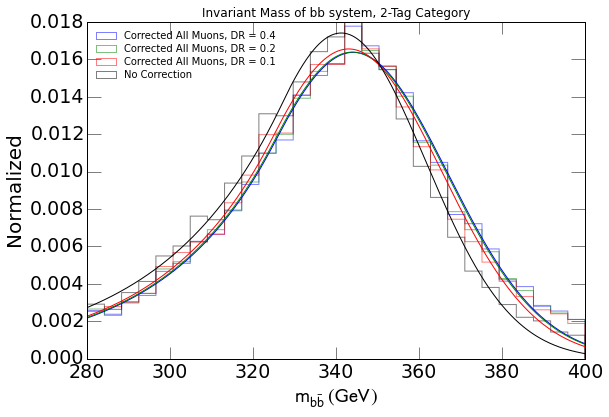

Peaks:
DR = 0.4, Peak = 344.15 +- 0.41 GeV, Sigma = 22.74 +- 0.45 GeV
DR = 0.2, Peak = 343.87 +- 0.41 GeV, Sigma = 22.70 +- 0.45 GeV
DR = 0.1, Peak = 343.03 +- 0.40 GeV, Sigma = 22.37 +- 0.44 GeV
No Correction, Peak = 341.23 +- 0.42 GeV, Sigma = 20.39 +- 0.43 GeV


In [398]:
dr_plots(yybb04, yybb02, yybb01, yybb, xmin = 280, xmax = 400)

INFO:rootpy.plotting.style:using matplotlib style 'ATLAS'


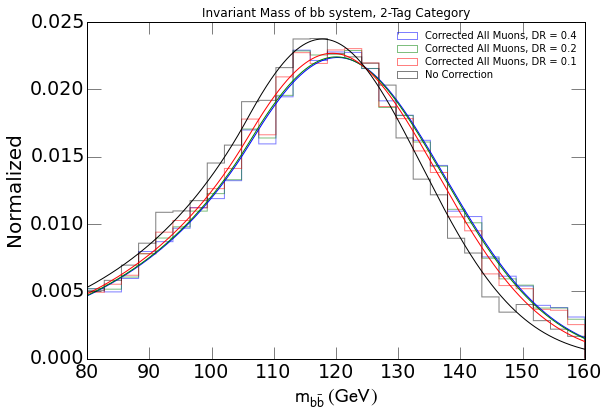

Peaks:
DR = 0.4, Peak = 120.26 +- 0.33 GeV, Sigma = 17.19 +- 0.36 GeV
DR = 0.2, Peak = 120.05 +- 0.33 GeV, Sigma = 17.16 +- 0.36 GeV
DR = 0.1, Peak = 119.41 +- 0.33 GeV, Sigma = 16.91 +- 0.36 GeV
No Correction, Peak = 117.81 +- 0.32 GeV, Sigma = 15.91 +- 0.34 GeV


In [399]:
dr_plots(bb04, bb02, bb01, bb, xmin = 80, xmax = 160)